# Implementing Reflection Pattern

- Implementation of reflection pattern in code & use it to improve data visualization

## Imports

In [1]:
import re
import json
import myutils

## Exploratory Data Analysis (EDA)

In [2]:
df = myutils.load_and_prepare_data("data/coffee_sales.csv")
df.sample(n=5)

,date,time,cash_type,card,price,coffee_name,quarter,month,year
2141,2024-10-29,09:45,card,ANON-0000-0000-0831,2.596,Cortado,4,10,2024
1164,2024-08-04,10:13,card,ANON-0000-0000-0040,2.792,Americano with Milk,3,8,2024
460,2024-05-12,17:12,card,ANON-0000-0000-0012,3.282,Americano with Milk,2,5,2024
513,2024-05-18,17:10,card,ANON-0000-0000-0009,3.772,Latte,2,5,2024
71,2024-03-09,15:13,card,ANON-0000-0000-0044,3.870,Hot Chocolate,1,3,2024


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   time         3636 non-null   object        
 2   cash_type    3636 non-null   object        
 3   card         3547 non-null   object        
 4   price        3636 non-null   float64       
 5   coffee_name  3636 non-null   object        
 6   quarter      3636 non-null   int32         
 7   month        3636 non-null   int32         
 8   year         3636 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(4)
memory usage: 213.2+ KB


In [4]:
df.isna().sum()

date            0
time            0
cash_type       0
card           89
price           0
coffee_name     0
quarter         0
month           0
year            0
dtype: int64

In [5]:
display(df[df.isna().any(axis=1)])

,date,time,cash_type,card,price,coffee_name,quarter,month,year
12,2024-03-02,08:52,cash,NaN,4.0,Latte,1,3,2024
18,2024-03-03,07:00,cash,NaN,4.0,Latte,1,3,2024
41,2024-03-06,08:42,cash,NaN,3.5,Americano with Milk,1,3,2024
46,2024-03-07,11:01,cash,NaN,4.0,Latte,1,3,2024
49,2024-03-07,14:30,cash,NaN,4.0,Latte,1,3,2024
...,...,...,...,...,...,...,...,...,...
657,2024-05-31,10:17,cash,NaN,3.9,Latte,2,5,2024
677,2024-06-01,15:56,cash,NaN,3.9,Cocoa,2,6,2024
685,2024-06-02,16:01,cash,NaN,3.4,Americano with Milk,2,6,2024
691,2024-06-03,14:11,cash,NaN,3.4,Americano with Milk,2,6,2024


In [6]:
df.describe()

,date,price,quarter,month,year
count,3636,3636.000000,3636.000000,3636.000000,3636.000000
mean,2024-09-30 11:56:02.376237568,3.174686,2.437844,6.394664,2024.259351
min,2024-03-01 00:00:00,1.812000,1.000000,1.000000,2024.000000
25%,2024-07-03 00:00:00,2.792000,1.000000,3.000000,2024.000000
50%,2024-10-06 12:00:00,3.282000,2.000000,6.000000,2024.000000
75%,2025-01-08 00:00:00,3.576000,4.000000,10.000000,2025.000000
max,2025-03-23 00:00:00,4.000000,4.000000,12.000000,2025.000000
std,NaN,0.491993,1.182280,3.480686,0.438339


- Build agentic workflow that generates data visualizations from dataset.
OBJ: Help answer questions about coffee sales from the vending machine.

## Pipeline Building

### Step1 - Generate Code to Create Chart

Prompt an LLM to write Python code to generate a chart in response to a user query.
* Query **"Create a plot comparing Q1 coffee sales in 2024 and 2025 using the data in coffee_sales.csv"**
* Output: **Python Code using matplotlib library**
Code will be written between `<execute_python>` tags.



In [7]:
def generate_chart_code(instruction: str, model: str, out_path_v1: str) -> str:
    """Generate Python code to make a plot with matplotlib using tag-based wrapping."""

    prompt = f"""
    You are a data visualization expert.

    Return your answer *strictly* in this format:

    <execute_python>
    # valid python code here
    </execute_python>

    Do not add explanations, only the tags and the code.

    The code should create a visualization from a DataFrame 'df' with these columns:
    - date (M/D/YY)
    - time (HH:MM)
    - cash_type (card or cash)
    - card (string)
    - price (number)
    - coffee_name (string)
    - quarter (1-4)
    - month (1-12)
    - year (YYYY)

    User instruction: {instruction}

    Requirements for the code:
    1. Assume the DataFrame is already loaded as 'df'.
    2. Use matplotlib for plotting.
    3. Add clear title, axis labels, and legend if needed.
    4. Save the figure as '{out_path_v1}' with dpi=300.
    5. Do not call plt.show().
    6. Close all plots with plt.close().
    7. Add all necessary import python statements

    Return ONLY the code wrapped in <execute_python> tags.
    """

    response = myutils.get_respose(model, prompt)
    return response

In [8]:
code_v1 = generate_chart_code(
    instruction=r"Create a plot comparing Q1 coffee sales in 2024 and 2025 using the data in the path .\data\coffee_sales.csv.",
    model="gemini-2.0-flash",
    out_path_v1="chart_v1.png"
)

In [9]:
print(f''' -- Generated Code --
      
    {code_v1}''')

 -- Generated Code --

    ```python
<execute_python>
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('.\data\coffee_sales.csv')

# Convert 'date' column to datetime objects, inferring the format
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

# Extract year, month, and quarter
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter

# Filter for Q1 sales in 2024 and 2025
q1_2024_sales = df[(df['year'] == 2024) & (df['quarter'] == 1)]
q1_2025_sales = df[(df['year'] == 2025) & (df['quarter'] == 1)]

# Group by coffee name and sum the prices
q1_2024_sales_by_coffee = q1_2024_sales.groupby('coffee_name')['price'].sum()
q1_2025_sales_by_coffee = q1_2025_sales.groupby('coffee_name')['price'].sum()

# Combine the data into a single DataFrame for plotting
sales_data = pd.DataFrame({'2024': q1_2024_sales_by_coffee, '2025': q1_2025_sales_by_coffee})

# Plotting
fig, ax = plt.subplots(figsi

### Step2 - Execute Code and Create Chart

Use of regular expression `re` to extract Python code generated by the LLM.
Once extracted, it'll run to produce the **first draft chart**

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('.\data\coffee_sales.csv')

# Convert 'date' column to datetime objects, inferring the format
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

# Extract year, month, and quarter
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter

# Filter for Q1 sales in 2024 and 2025
q1_2024_sales = df[(df['year'] == 2024) & (df['quarter'] == 1)]
q1_2025_sales = df[(df['year'] == 2025) & (df['quarter'] == 1)]

# Group by coffee name and sum the prices
q1_2024_sales_by_coffee = q1_2024_sales.groupby('coffee_name')['price'].sum()
q1_2025_sales_by_coffee = q1_2025_sales.groupby('coffee_name')['price'].sum()

# Combine the data into a single DataFrame for plotting
sales_data = pd.DataFrame({'2024': q1_2024_sales_by_coffee, '2025': q1_2025_sales_by_coffee})

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
sales_data.plot(kind='bar', ax=ax)

# Cust

<string>:5: SyntaxWarning: invalid escape sequence '\d'
<string>:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.


Generated Chart (V1)


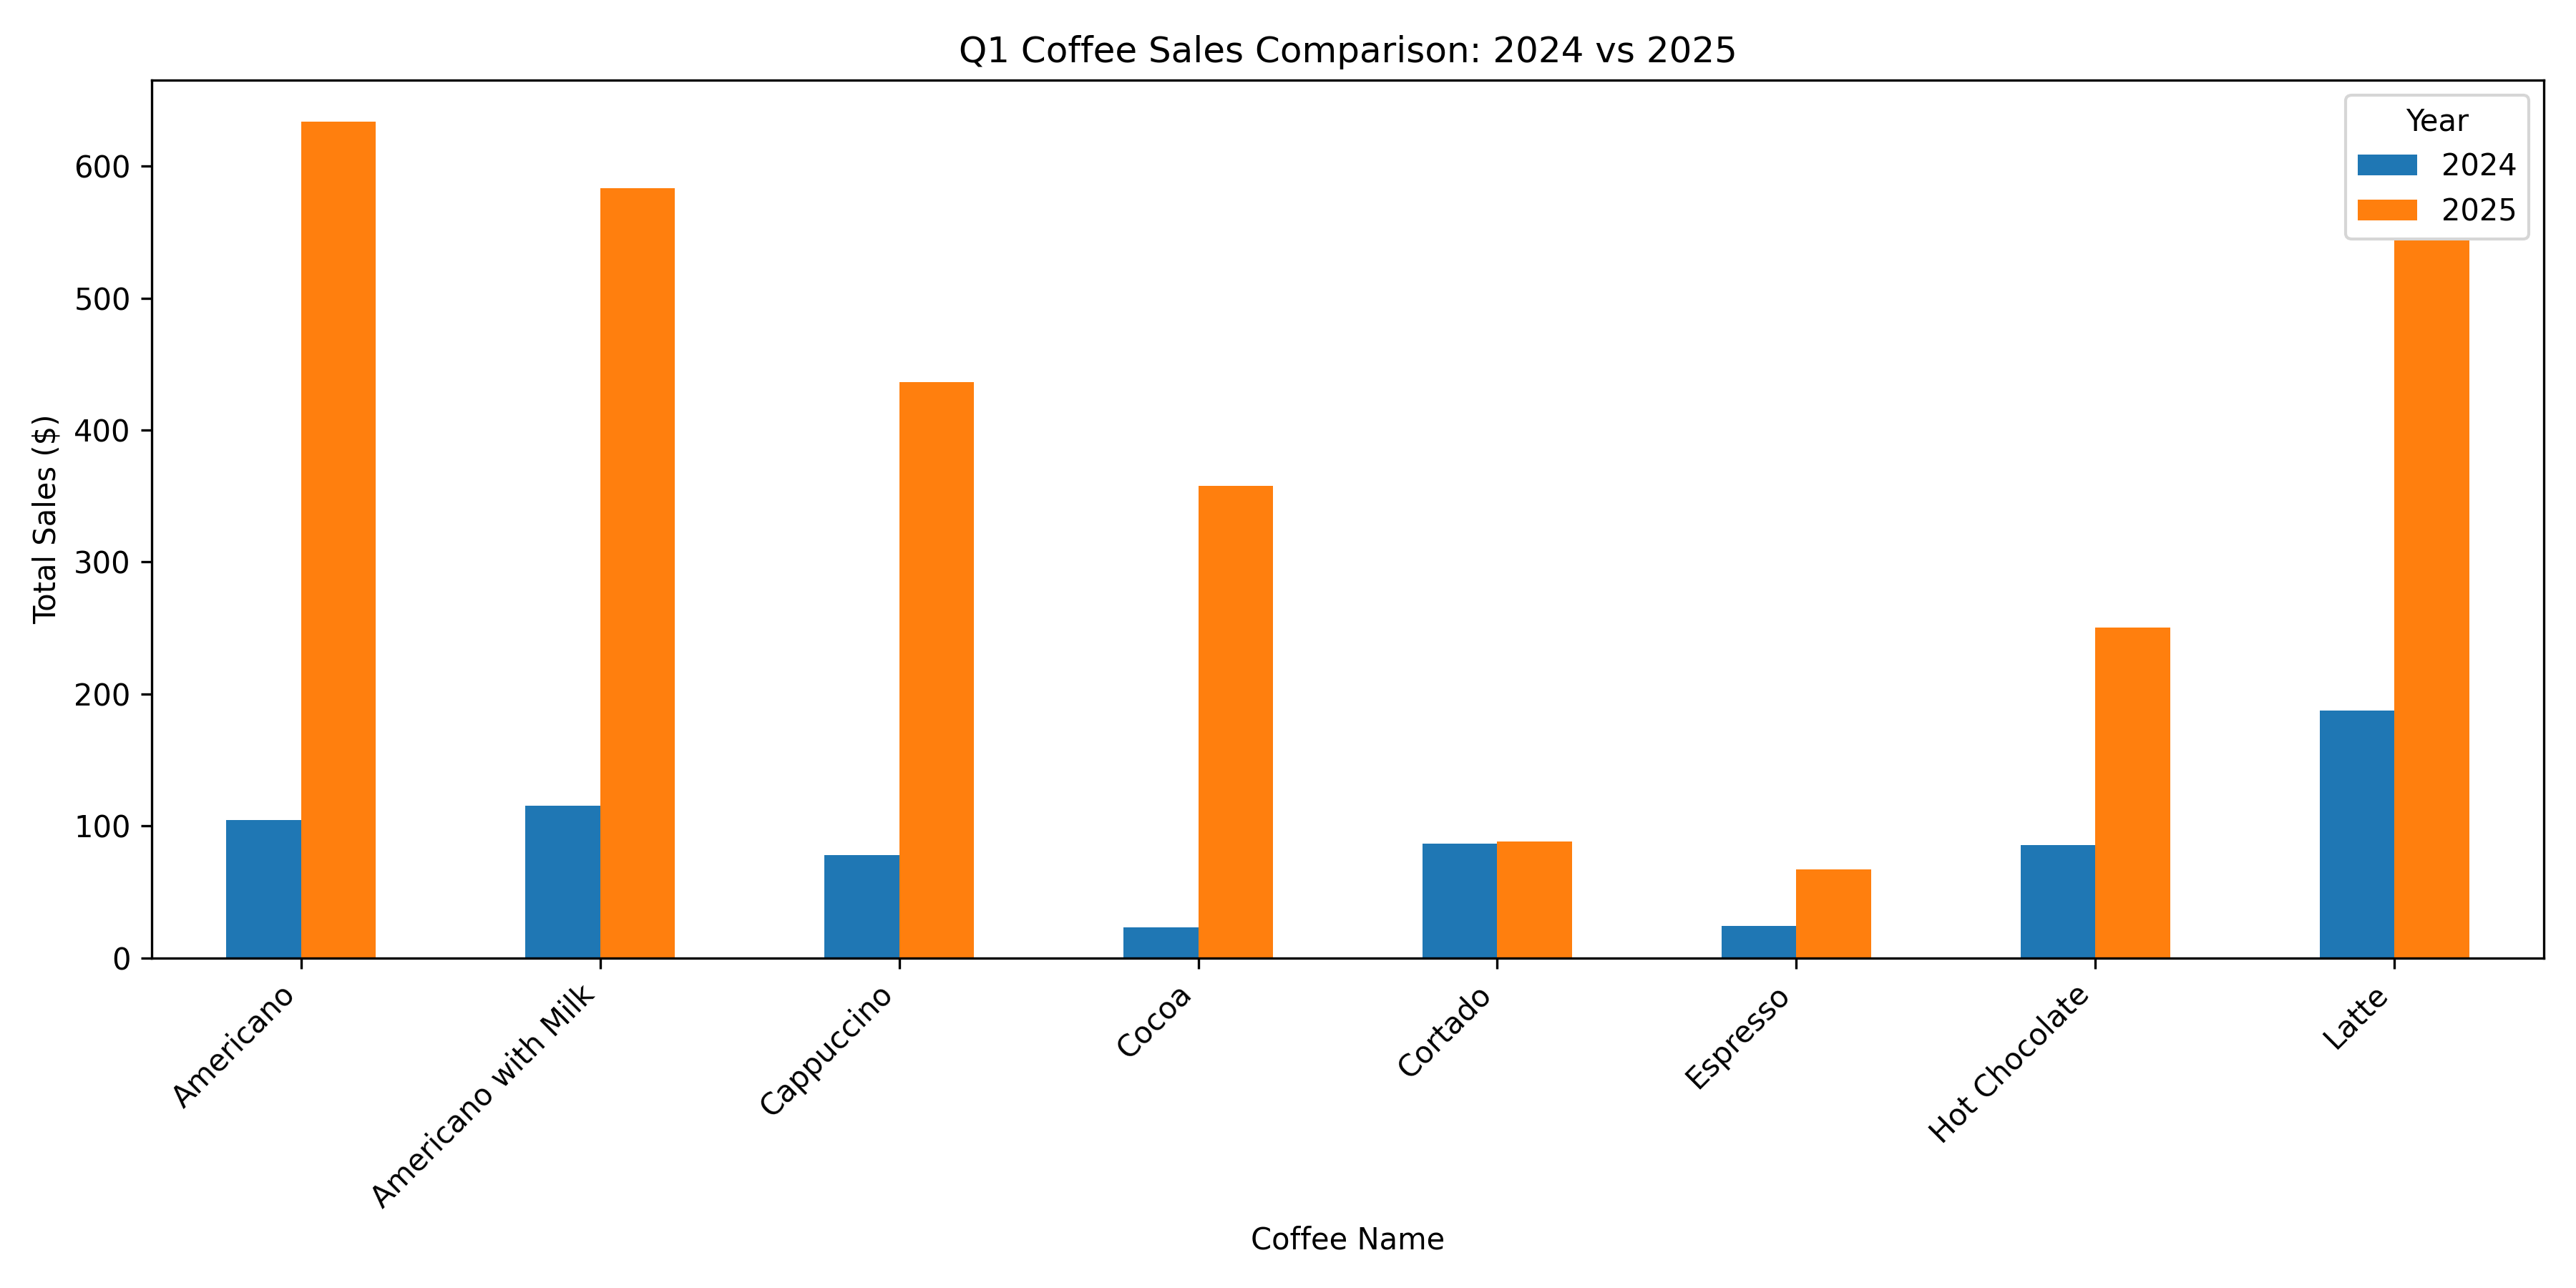

In [10]:
from IPython.display import Image, display
match = re.search(r"<execute_python>([\s\S]*?)</execute_python>", code_v1)
if match:
    initial_code = match.group(1).strip()
    print(initial_code)
    exec_globals = {'df': df}
    exec(initial_code, exec_globals)

    print('Generated Chart (V1)')
    display(Image(filename='chart_v1.png'))
    

## Step 3 - Reflect on the output

Simulate how a human would review a first draft of a chart.

1. Provide chart to LLM
2. Analyze chart visually
3. Generate feedback

Intelligent feedback loop to create critiqued second version V2 of the chart.

In [37]:
def reflect_on_image_and_generate(chart_path: str, instruction: str, model_name: str, out_path_v2: str, code_v1: str) -> tuple[str, str]:
    """
    Critique the chart IMAGE and the original code against the instruction, 
    then return refined matplotlib code.
    Returns (feedback, refined_code_with_tags).
    """
    media_type, b64 = myutils.encode_image_b64(chart_path)

    prompt = f"""
    You are a data visualization expert.
    Your task: critique the attached chart and the original code against the given instruction,
    then return improved matplotlib code. You will add whatever information you consider important for the user. You will allways return an improved version of the code.

    Original code (for context):
    {code_v1}

    OUTPUT FORMAT (STRICT):
    1) First line: a valid JSON object with ONLY the "feedback" field.
    Example: {{"feedback": "The legend is unclear and the axis labels overlap."}}

    2) After a newline, output ONLY the refined Python code wrapped in:
    <execute_python>
    ...
    </execute_python>

    3) Import all necessary libraries in the code. Don't assume any imports from the original code.

    HARD CONSTRAINTS:
    - Do NOT include Markdown, backticks, or any extra prose outside the two parts above.
    - Use pandas/matplotlib only (no seaborn).
    - Assume df already exists; do not read from files.
    - Save to '{out_path_v2}' with dpi=300.
    - Always call plt.close() at the end (no plt.show()).
    - Include all necessary import statements.

    Schema (columns available in df):
    - date (M/D/YY)
    - time (HH:MM)
    - cash_type (card or cash)
    - card (string)
    - price (number)
    - coffee_name (string)
    - quarter (1-4)
    - month (1-12)
    - year (YYYY)

    Instruction:
    {instruction}
    """
    content = myutils.image_gemini_call(model_name, prompt, media_type, b64)
    # --- Parse ONLY the first JSON line (feedback) ---
    lines = content.strip().splitlines()
    json_line = lines[0].strip() if lines else ''

    try:
        obj = json.loads(json_line)
    except Exception as e:
        # Fallback: try to capture the first {...} in all the content
        m_json = re.search(r"\{.*?\}", content, flags=re.DOTALL)
        if m_json:
            try:
                obj = json.loads(m_json.group(0))
            except Exception as e2:
                obj = {"feedback": f"Failed to parse JSON feedback: {e2}", "refined_code":""}
        else:
            obj = {"feedback": f"Failed to parse JSON feedback: {e}", "refined_code":""}

# --- Extract refined code from <execute_python>...</execute_python> ---    m_code = re.search(r"<execute_python>([\s\S]*?)</execute_python>", content)
    m_code = re.search(r"<execute_python>([\s\S]*?)</execute_python>", content)
    refined_code_body = m_code.group(1).strip() if m_code else ""
    refined_code = myutils.ensure_execute_python_tags(refined_code_body)

    feedback = str(obj.get("feedback", "")).strip()
    return feedback, refined_code

## Step 4 - Generate and Execute Improved Version (V2)

In [38]:
feedback, code_v2 = reflect_on_image_and_generate(
    chart_path="chart_v1.png",
    instruction=r"Create a plot comparing Q1 coffee sales in 2024 and 2025 using the data in the path .\data\coffee_sales.csv.",
    model_name="gemini-2.0-flash",
    out_path_v2="chart_v2.png",
    code_v1=code_v1 #Original code for CONTEXT
)

In [39]:
feedback

"The original code is well-structured and produces the desired plot. However, the x-axis labels are a bit crowded and overlap. Increased figure size and adjusted the label rotation can mitigate this. Also, explicitly specifying the bar width can improve the plot's visual appeal, and adding gridlines enhances readability. Finally, using a more descriptive title and ensuring all labels are clear improves overall presentation."

In [40]:
code_v2

'<execute_python>\n\n</execute_python>'


Generated Chart (V2)


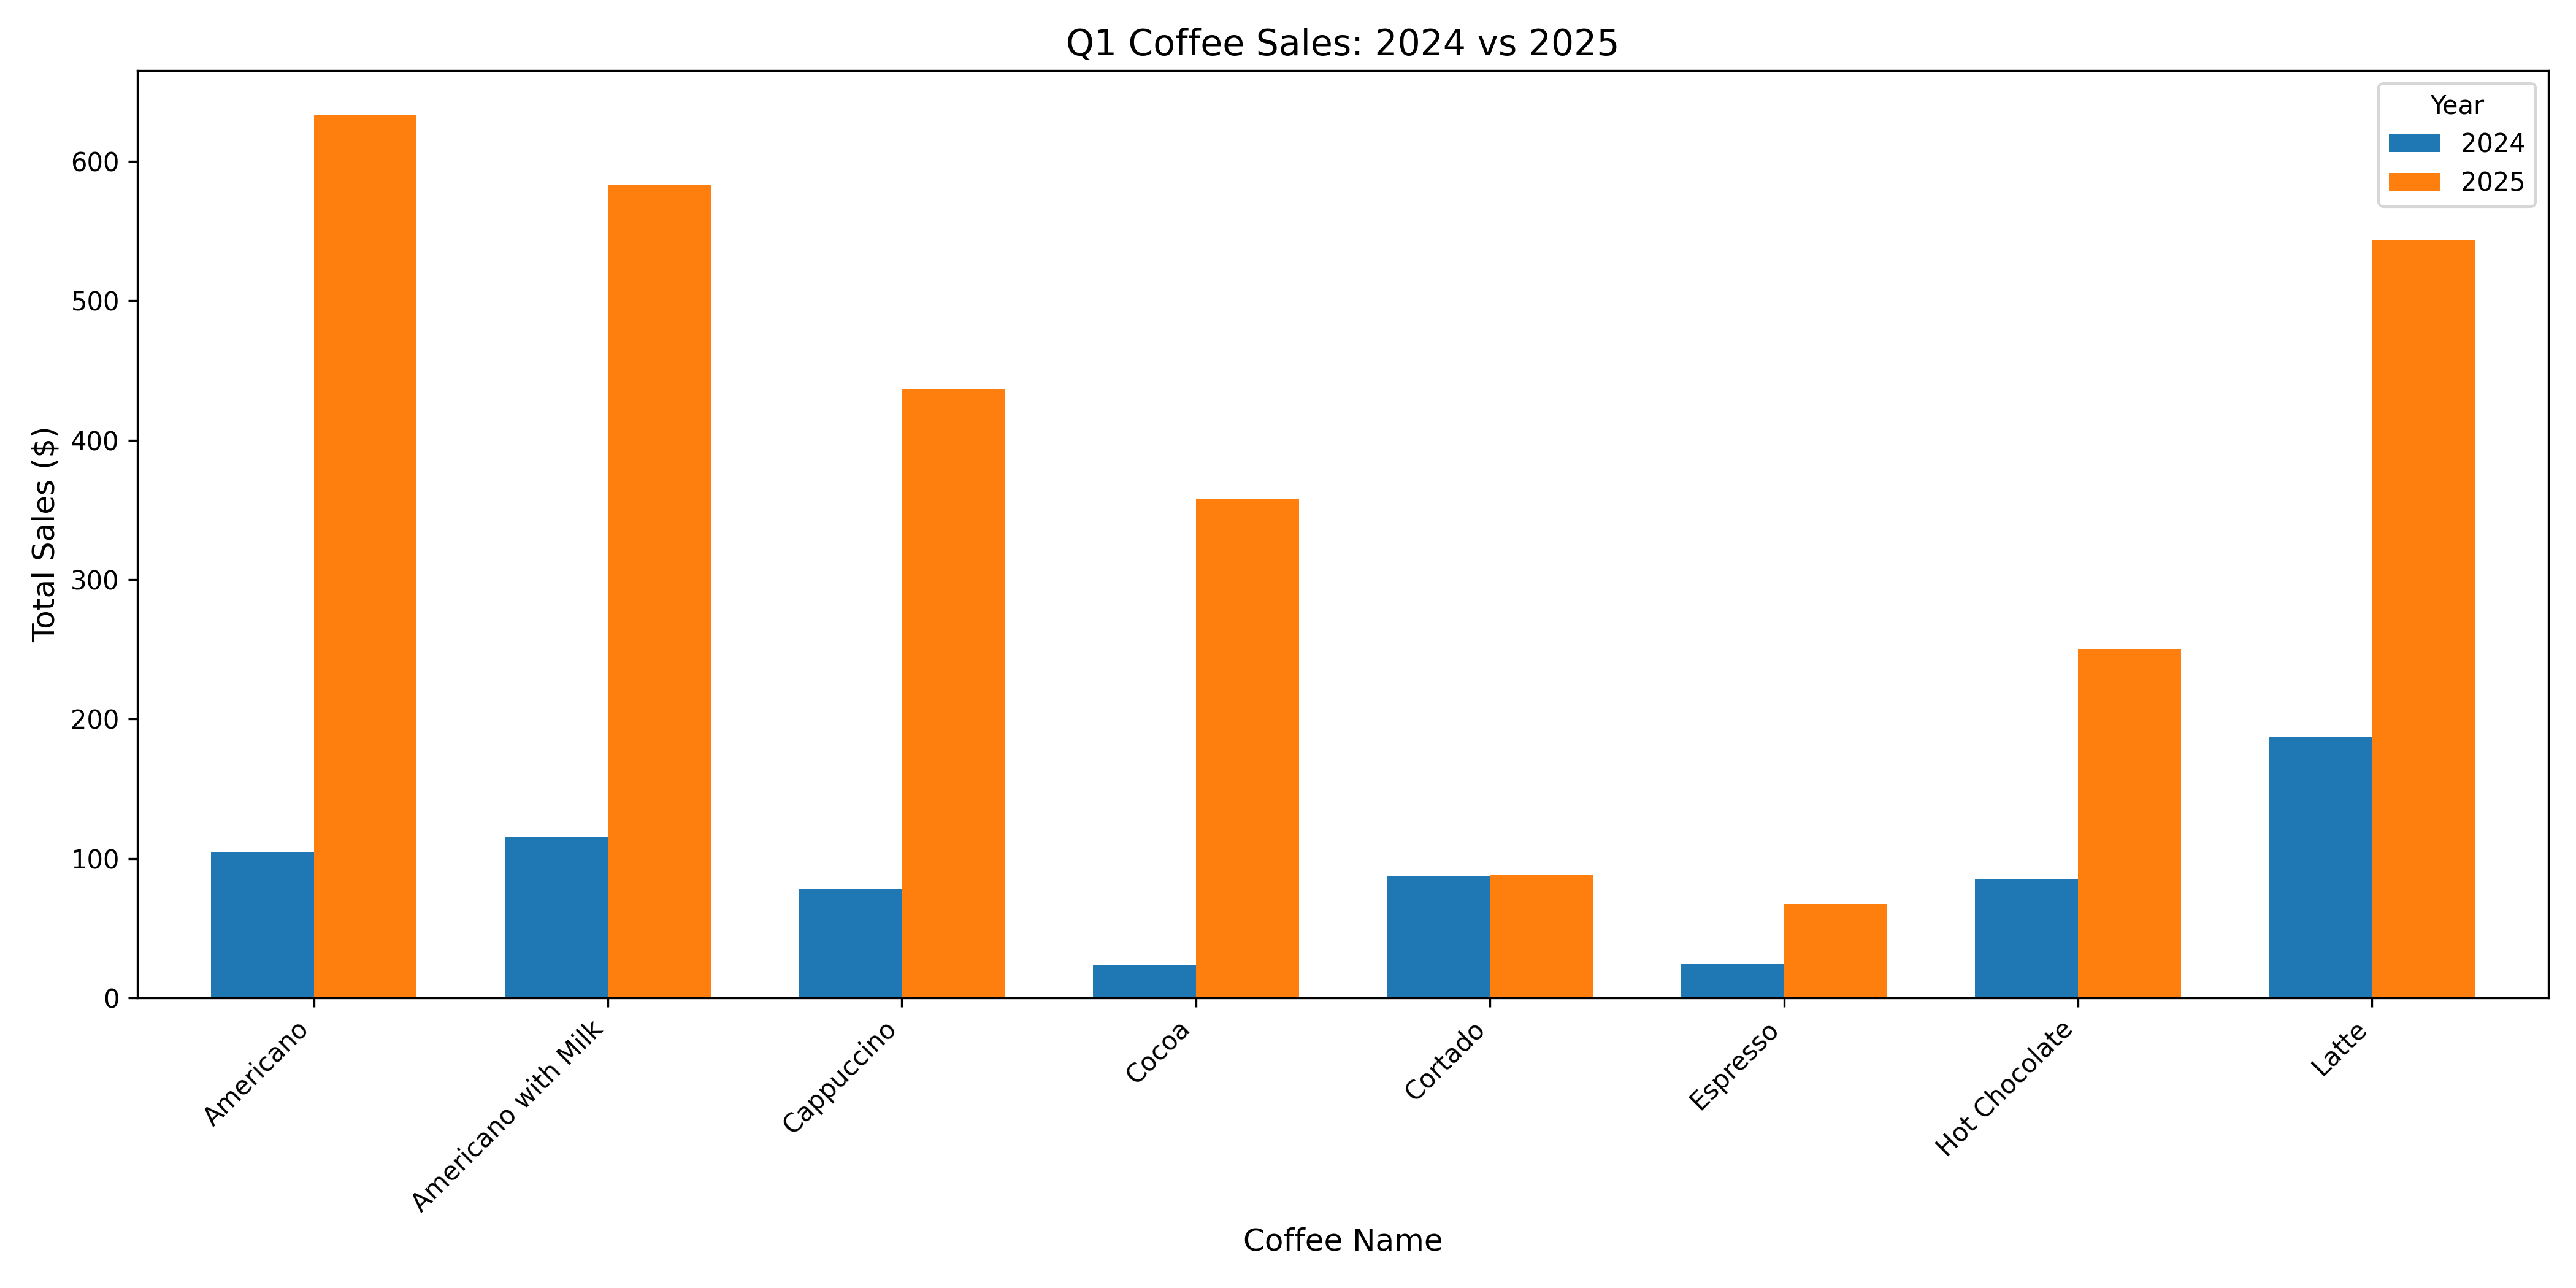

In [41]:
match = re.search(r"<execute_python>([\s\S]*?)</execute_python>", code_v2)
if match:
    initial_code = match.group(1).strip()
    print(initial_code)
    exec_globals = {'df': df}
    exec(initial_code, exec_globals)

    print('Generated Chart (V2)')
    display(Image(filename='chart_v2.png'))